In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/the-wildfire-dataset


In [2]:
#importing necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input





In [3]:
#to ensure the GPU is present
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
  print('GPU is Used!')
else:
  print("GPU is Unavailable!")


GPU is Used!


In [4]:
#to load and explore the dataset
train_dir= '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train'
val_dir= '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val'
test_dir= '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test'


In [5]:
#to list all classes
classes = os.listdir(train_dir)
num_classes=len(classes)

#display the class names
print(f"Number of classes: {num_classes}")
print(f"Classes:{classes}")

Number of classes: 2
Classes:['nofire', 'fire']


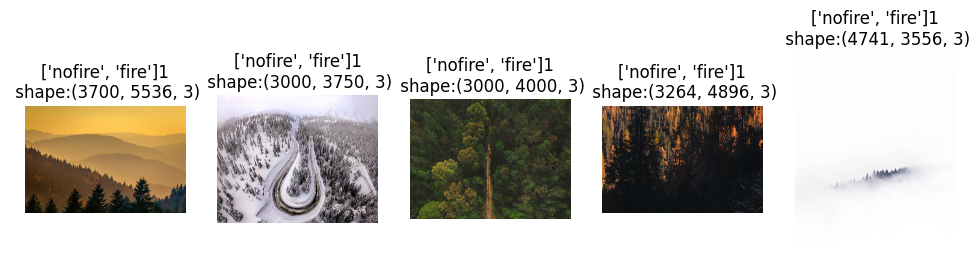

In [6]:
#to visualize the images in the dataset
plt.figure(figsize=(12,10))
for i in range(5):
  class_path=os.path.join(train_dir,classes[0])
  img_name=os.listdir(class_path)[i]
  img_path=os.path.join(class_path,img_name)
  img=plt.imread(img_path)

  plt.subplot(1,5,i+1)
  plt.imshow(img)
  plt.title(f'{classes}{1}\n shape:{img.shape}')
  plt.axis('off')
plt.show()

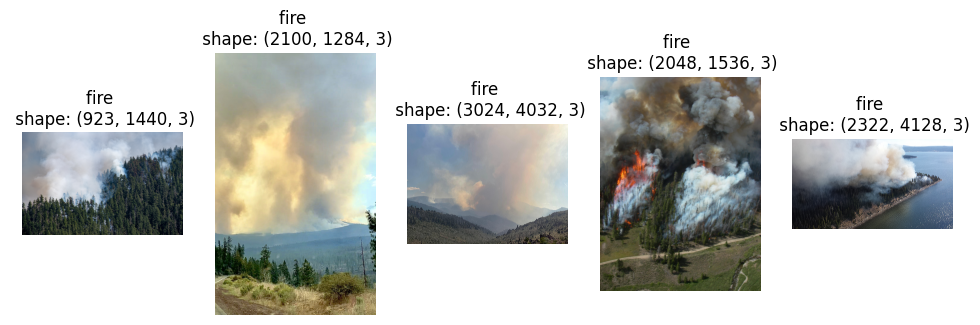

In [7]:
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[1])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[1]} \n shape: {img.shape}')
  plt.axis('off')
plt.show()

In [10]:
#Preprocessing
#Image dimensions and batch size
img_width, img_height = 150,150
batch_size = 32 3indicates the no of images in batch

#Data generators
#No fire-0, fire-1
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [12]:
#mapping indices
class_mapping = train_generator.class_indices
#print(class_mapping)
#Extract the class names
class_names = list(class_mapping.keys())
print("Class Names:",class_names)

Class Names: ['fire', 'nofire']


In [17]:
#Buliding the CNN Model
model = Sequential([
    Input(shape=(img_width, img_height, 3)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(512,activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
]
)